# 데이터 다운로드

In [8]:
# !kaggle competitions download -c house-prices-advanced-regression-techniques

  0%|                                                | 0.00/199k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 199k/199k [00:00<00:00, 20.5MB/s]


In [9]:
# import zipfile
# import os

# # ZIP 파일 경로
# zip_path = '/teamspace/studios/this_studio/home_price/house-prices-advanced-regression-techniques.zip'

# # 압축 풀기
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall('/teamspace/studios/this_studio/home_price/data')

# # 선택사항: 압축 해제 후 zip 파일 삭제
# os.remove(zip_path)

In [1]:
import pandas as pd

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [2]:
print('Shape of Train Data is : ', train.shape)
print('Shape of Test Data is : ', test.shape)

Shape of Train Data is :  (1460, 81)
Shape of Test Data is :  (1459, 80)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# 피쳐 엔지니어링

## 이상치 제거

In [5]:
train.drop(train[(train["OverallQual"]<4) & (train["SalePrice"]>200000)].index, inplace=True)
train.drop(train[(train["OverallCond"]<4) & (train["SalePrice"]>200000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)
train.shape

(1458, 81)

## 종속 변수의 로그 변환

The value of mu before log transformation is :  180761.24142661178
The value of sigma before log transformation is :  79270.93617295024


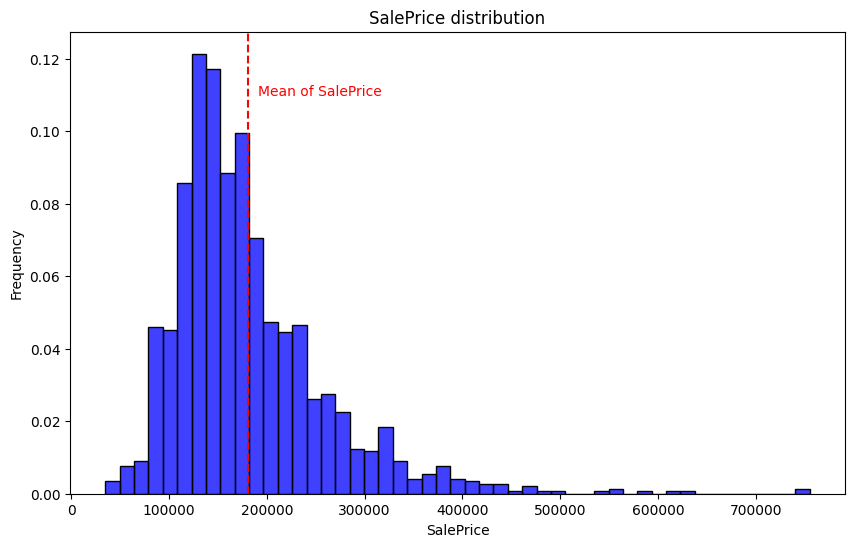

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

(mu, sigma) = norm.fit(train["SalePrice"])
print("The value of mu before log transformation is : ", mu)
print("The value of sigma before log transformation is : ", sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train["SalePrice"], color="b", stat="probability")
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")

plt.axvline(mu, color="r", linestyle="--")
plt.text(mu+10000, 0.11, "Mean of SalePrice", rotation=0, color="r")
fig.show()
